In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string
import time

In [2]:
complaints = pd.read_csv('complaints.csv')

In [3]:
complaints = complaints.rename(columns = {'Consumer complaint narrative': 'complaints_narrative',
                                         'Issue': 'complaints_issue'})

In [4]:
complaints

,complaints_narrative,complaints_issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [5]:
#remove X's
complaints['complaints_narrative'] = complaints['complaints_narrative'].str.replace(r'[xX][xX]+',"", regex = True)

In [26]:
#remove numbers
complaints['complaints_narrative'] = complaints['complaints_narrative'].str.replace('\d+', '', regex=True)

In [27]:
complaints['complaint_length'] = complaints['complaints_narrative'].apply(len)

In [21]:
#Asha's code to remove stop words and punctuation
stopwords_list = stopwords.words('english') + list(string.punctuation)

def tokenize_and_remove_stopwords(dataframe, column_name):
    stopwords_list = stopwords.words('english') + list(string.punctuation) 

    tokenized_data = []
    for row in dataframe[column_name]:
        tokens = nltk.word_tokenize(row.lower())
        filtered_tokens = [token.lemma_.strip() for token in tokens if token not in stopwords_list]
        tokenized_data.append(filtered_tokens)

    return tokenized_data

complaints['issues_tokenized'] = tokenize_and_remove_stopwords(complaints, 'complaints_narrative')

In [23]:
complaints

,complaints_narrative,complaints_issue,complaint_length,issues_tokenized
0,My name is this complaint is not made in err...,Incorrect information on your report,679,"[name, complaint, made, error, neither, made, ..."
1,I searched on for and was pointed to a web...,Fraud or scam,1890,"[searched, pointed, website, legitimately, bel..."
2,I have a particular account that is stating th...,Incorrect information on your report,294,"[particular, account, stating, owe, 10000.00, ..."
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed,3396,"[supplied, proof, doctrine, estoppel, silence,..."
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report,860,"[hello, 'm, writing, regarding, account, credi..."
...,...,...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed,42,"[collections, account, knowledge]"
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed,4290,"[dear, cfpb, team, reason, complaint, tried, r..."
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed,4248,"[frca, violations, failing, follow, debt, disp..."
353430,"My Father, a acquired an HECM reverse mortg...",Struggling to pay mortgage,5206,"[father, acquired, hecm, reverse, mortgage, pr..."


In [ ]:
#add lemmatization to Asha's code using nltk
from nltk.stem import WordNetLemmatizer


def tokenize_and_lemmatize(dataframe, column_name):
    stopwords_list = stopwords.words('english') + list(string.punctuation)
    lemmatizer = WordNetLemmatizer()
    tokenized_data = []
    
    for row in dataframe[column_name]:
        tokens = nltk.word_tokenize(row.lower())
        filtered_tokens = [lemmatizer.lemmatize(token.strip()) for token in tokens if token not in stopwords_list]
        tokenized_data.append(filtered_tokens)

    return tokenized_data

In [16]:
#Using Spacy to tokenize and lemmatize
#or Using Spacy
import spacy
nlp = spacy.load('en_core_web_sm')

In [17]:
#Using Spacy to tokenize and lemmatize
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop
             and not token.is_digit
             and not token.is_punct
             and not token.is_space]
    return ' '.join(tokens)

In [ ]:
#this took more than 30 minutes and never finished
complaints['clean_narrative'] = complaints['complaints_narrative'].apply(preprocess_text)

In [ ]:
#attempt #3 Using Spacy nlp to tokenize and lemmatize

In [ ]:
# Lemmatization with stopwords removal
complaints['lemmatized']=complaints['complaints_narrative'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [31]:
# Load spaCy pipeline
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# Process large text as a stream via `nlp.pipe()` and iterate over the results, extracting lemmas
lemma_text_list = []
for doc in nlp.pipe(complaints['complaints_narrative']):
    lemma_text_list.append(" ".join(token.lemma_ for token in doc if not token.is_stop))
complaints["text_lemma"] = lemma_text_list

In [ ]:
# Use mapping to convert columns to numerical values
issue_mapping = {'Attempts to collect debt not owed': 1, 
                 'Communication tactics': 2, 
                 'Fraud or scam': 3, 
                 'Incorrect information on your report': 4,
                 'Struggling to pay mortgage': 5}

# replace the issue values with numerical values

complaints['issue'] = complaints['issue'].replace(issue_mapping)

### Tim's pickle file

In [3]:
complaints_tim = pd.read_pickle('complaints_nlp.pkl')

In [4]:
complaints_tim

,issue,complaint_length,tokens,stems,lemmas
0,4,711,"[name, complaint, made, error, neither, made, ...","[name, complaint, made, error, neither, made, ...","[name, complaint, made, error, neither, made, ..."
1,3,1958,"[searched, pointed, website, legitimately, bel...","[search, point, websit, legitim, believ, websi...","[searched, pointed, website, legitimately, bel..."
2,4,294,"[particular, account, stating, owe, listed, cr...","[particular, account, state, owe, list, credit...","[particular, account, stating, owe, listed, cr..."
3,1,3444,"[supplied, proof, doctrine, estoppel, silence,...","[suppli, proof, doctrin, estoppel, silenc, eng...","[supplied, proof, doctrine, estoppel, silence,..."
4,4,876,"[hello, im, writing, regarding, account, credi...","[hello, im, write, regard, account, credit, re...","[hello, im, writing, regarding, account, credi..."
...,...,...,...,...,...
353427,1,42,"[collections, account, knowledge]","[collect, account, knowledg]","[collection, account, knowledge]"
353428,1,4586,"[dear, cfpb, team, reason, complaint, tried, r...","[dear, cfpb, team, reason, complaint, tri, res...","[dear, cfpb, team, reason, complaint, tried, r..."
353429,1,4328,"[frca, violations, failing, follow, debt, disp...","[frca, violat, fail, follow, debt, disput, pro...","[frca, violation, failing, follow, debt, dispu..."
353430,5,5418,"[father, acquired, hecm, reverse, mortgage, pr...","[father, acquir, hecm, revers, mortgag, proper...","[father, acquired, hecm, reverse, mortgage, pr..."


In [2]:
complaints_proc = pd.read_csv('complaints_proc.csv')

In [14]:
complaints_proc

,complaints_narrative,complaints_issue,complaint_length,clean_narrative
0,My name is this complaint is not made in err...,4,679,complaint error party declare penalty perjury ...
1,I searched on for and was pointed to a web...,3,1890,search point website legitimately believe webs...
2,I have a particular account that is stating th...,4,294,particular account state owe $ . list credit r...
3,I have not supplied proof under the doctrine o...,1,3396,supply proof doctrine estoppel silence engelha...
4,Hello i'm writing regarding account on my cred...,4,860,hello write account credit report belong open ...
...,...,...,...,...
353427,Collections account I have no knowledge of,1,42,collection account knowledge
353428,"Dear CFPB Team, The reason for my complaint is...",1,4290,dear cfpb team reason complaint try resolve ac...
353429,FRCA violations : Failing to Follow Debt Dispu...,1,4248,frca violation fail follow debt dispute proced...
353430,"My Father, a acquired an HECM reverse mortg...",5,5206,father acquire hecm reverse mortgage property ...


In [13]:
# remove double x-s or more
complaints_proc['clean_narrative'] = complaints_proc['clean_narrative'].str.replace(r'[xX][xX]+','', regex=True)

# remove double __ or more
complaints_proc['clean_narrative'] = complaints_proc['clean_narrative'].str.replace(r'__+','', regex=True)

# stripping all numeric values from complaints
complaints_proc['clean_narrative'] = complaints_proc['clean_narrative'].str.replace('\d+', '', regex=True)

In [35]:
# Use mapping to convert columns to numerical values
issue_mapping = {'Attempts to collect debt not owed': 0, 
                 'Communication tactics': 1, 
                 'Fraud or scam': 2, 
                 'Incorrect information on your report': 3,
                 'Struggling to pay mortgage': 4}

# replace the issue values with numerical values

complaints_proc['complaints_issue'] = complaints_proc['complaints_issue'].replace(issue_mapping)

In [44]:
complaints_proc['complaints_issue'].unique()

array([4, 3, 1, 2, 5], dtype=int64)

In [45]:
complaints_proc['complaints_issue'] = complaints_proc['complaints_issue'] - 1

In [46]:
complaints_proc['complaints_issue'].unique()

array([3, 2, 0, 1, 4], dtype=int64)

In [47]:
X = complaints_proc[['clean_narrative']].fillna('')
y = complaints_proc['complaints_issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
vect = CountVectorizer()

X_train_vec = vect.fit_transform(X_train['clean_narrative'])
X_test_vec = vect.transform(X_test['clean_narrative'])

In [9]:
len(vect.vocabulary_)

61372

In [34]:
vect.vocabulary_['great']

26055

In [18]:
#59
X_train_vec.sum(axis=0).tolist()[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 90,
 18,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 8,
 2,
 5,
 1,
 1,
 2,
 11,
 1,
 1,
 1,
 10,
 1,
 7,
 80,
 1,
 1,
 1,
 10,
 1,
 3,
 2,
 1,
 5,
 1,
 2,
 12,
 1,
 9,
 1,
 6,
 1,
 9,
 237,
 1,
 1,
 1,
 8,
 2,
 1,
 1,
 1,
 169,
 26,
 21,
 1,
 1,
 1,
 326,
 1,
 13,
 90,
 1,
 1,
 9,
 37,
 1,
 1,
 1,
 27,
 1,
 28,
 43,
 1,
 43,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 4,
 73,
 14,
 6,
 3,
 1,
 28,
 3,
 1,
 1447,
 3,
 1,
 2,
 4,
 1,
 5857,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 4,
 1,
 1,
 4,
 19208,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 2,
 3,
 12,
 3,
 1,
 2,
 1,
 23,
 9,
 2,
 5,
 2,
 1,
 55,
 2,
 1,
 1,
 2,
 17,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 11,
 3,
 3,
 2,
 1,
 49,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 38,
 1,
 44,
 6,
 1,
 1,
 1,
 1,
 2,
 39,
 5,
 1,
 1,
 9,
 42,
 1,
 13,
 24,
 2,
 1,
 4,
 85,
 73,
 4,
 1,
 1,
 34,
 161,
 1,
 1,
 7,
 2,
 1,
 12,
 1,
 555,
 1,
 406,
 5,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 747,
 1,
 2730,
 3,
 2,
 1

In [39]:
#60
# Fill this in to build a DataFrame of words and their counts
word_counts = pd.DataFrame({
    'words': vect.get_feature_names_out(),
    'frequency': X_train_vec.sum(axis=0).tolist()[0]
})

word_counts.head()

,words,frequency
0,__,1
1,___signed_identity,1
2,_c,1
3,_cfpb_consent,1
4,_cfpb_debt,1


In [20]:
#61
word_counts.sort_values('frequency')

,words,frequency
0,__,1
30960,mandat,1
30954,mance,1
30953,manattan,1
30952,manatee,1
...,...,...
13335,debt,182292
26516,information,290530
485,account,507782
42712,report,509970


In [ ]:
#5/16--xg boost

# XG BOOST

In [31]:
#pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb

In [52]:
%%time
xg_clas = xgb.XGBClassifier(colsample_bytree=0.3, learning_rate= 0.05, max_depth= 6, n_estimators= 500)
xg_clas.fit(X_train_vec, y_train)
y_pred_xg = xg_clas.predict(X_test_vec)

CPU times: total: 44min 30s
Wall time: 8min 13s


In [54]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Accuracy:',accuracy_score(y_test, y_pred_xg))
print('F1 Score unweighted', f1_score(y_test, y_pred_xg, average = 'macro')) #unweighted for each class
print('F1 Score  weighted', f1_score(y_test, y_pred_xg, average = 'weighted')) #accounts for class imbalance

print(pd.crosstab(y_test, y_pred_xg, rownames = ['Actual'], colnames = ['Predicted']))

Accuracy: 0.8766834921569071
F1 Score unweighted 0.8472179145006697
F1 Score  weighted 0.8737684974445086
Predicted      0     1     2      3     4
Actual                                   
0          12520   676   114   4897    84
1           1071  3835    18    356    31
2             81    40  2660    299     7
3           2559    80    59  54485   143
4             43    46    21    271  3962
CPU times: total: 62.5 ms
Wall time: 63.9 ms


In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_xg))
print(classification_report(y_test,y_pred_xg))

[[12520   676   114  4897    84]
 [ 1071  3835    18   356    31]
 [   81    40  2660   299     7]
 [ 2559    80    59 54485   143]
 [   43    46    21   271  3962]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     18291
           1       0.82      0.72      0.77      5311
           2       0.93      0.86      0.89      3087
           3       0.90      0.95      0.93     57326
           4       0.94      0.91      0.92      4343

    accuracy                           0.88     88358
   macro avg       0.87      0.83      0.85     88358
weighted avg       0.87      0.88      0.87     88358



In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

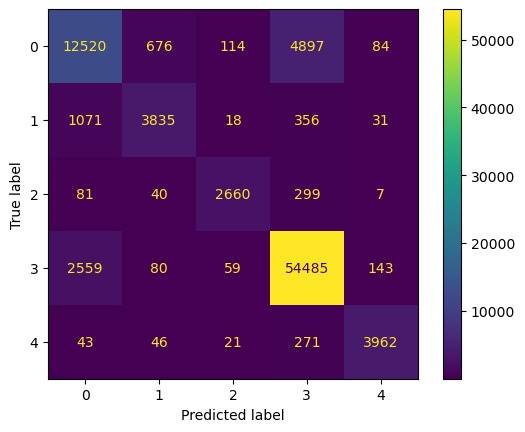

In [63]:
cm = confusion_matrix(y_test,y_pred_xg, labels = xg_clas.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xg_clas.classes_)
disp.plot()
plt.show()